### 개 품종 분류
- 딥러닝 팀 프로젝트 코드 수정본
- rembg 를 사용해서 배경을 제거한 강아지 7종의 데이터셋만을 사용하여 학습한 CNN 모델
- 데이터 출처 : https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification

개발 포인트
- ImageFolder
- Transforms
- DataLoader
- WeightedRandomSampler
- CNN

(1) 데이터 준비 (Dataset / ImageFolder, DataLoader)

In [1]:
from PIL import Image
import torchvision.transforms as transforms

In [2]:
### 데이터셋에 적용할 변환(전처리) 설정
preprocessing = transforms.Compose([
    transforms.Resize((30, 30)),    # 30x30 크기
    transforms.ToTensor()
])

In [3]:
from torchvision.datasets import ImageFolder

In [4]:
### 데이터셋 생성
img_root = './Images-resized'

imgDS = ImageFolder(root=img_root, transform=preprocessing)

In [5]:
len(imgDS)

1297

In [6]:
type(imgDS)

torchvision.datasets.folder.ImageFolder

In [7]:
imgDS.classes

['Chihuahua',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'beagle',
 'bluetick',
 'papillon']

In [8]:
imgDS.class_to_idx  # 클래스 이름 : 해당 인덱스

{'Chihuahua': 0,
 'Maltese_dog': 1,
 'Pekinese': 2,
 'Shih-Tzu': 3,
 'beagle': 4,
 'bluetick': 5,
 'papillon': 6}

In [9]:
type(imgDS.class_to_idx)

dict

In [13]:
imgDS.imgs

[('./Images-resized\\Chihuahua\\n02085620_10074.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_10131.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_10621.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_1073.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_10976.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11140.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11238.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11258.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11337.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11477.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_1152.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11696.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11818.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_11948.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_1205.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_12101.png', 0),
 ('./Images-resized\\Chihuahua\\n02085620_12334.png', 0),
 ('./Images-resiz

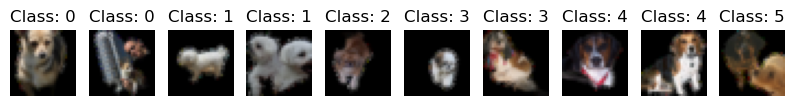

In [14]:
### 데이터 확인
import matplotlib.pyplot as plt
import numpy as np

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(imgDS[i*120][0], (1, 2, 0)))    # (C, H, W) -> (H, W, C)로 변환
    plt.title('Class: ' + str(imgDS[i*120][1]))

In [15]:
# 클래스별 샘플 수 계산
import os

def file_count_in_dir(path):
    """ path : 대장 폴더 주소 """
    if not path.endswith('/'):
        path += '/'
    
    file_count = dict()
    
    datalist = os.listdir(path)
    for data in datalist:
        if os.path.isdir(path + data):
            sub_datalist = os.listdir(path + data)
            file_count[path + data] = len(sub_datalist)
    return file_count

file_count = file_count_in_dir(img_root)
file_count2 = {key.split('/')[-1]: value for key, value in file_count.items()}
print(file_count2)

{'beagle': 195, 'bluetick': 139, 'Chihuahua': 152, 'Maltese_dog': 252, 'papillon': 196, 'Pekinese': 149, 'Shih-Tzu': 214}


In [16]:
sum(file_count2.values())

1297

In [17]:
class_names = imgDS.class_to_idx

class_count = [file_count2[key] for key, value in class_names.items()]
print(class_count)

[152, 252, 149, 214, 195, 139, 196]


In [18]:
### Sampler에서 사용할 가중치 생성
total_image_count = len(class_count)
# weights = [class_count / total_image_count for class_count in class_count]
weights = []
for i, v in enumerate(class_count):
    weights.extend([1 / v] * v)
print(len(weights))

1297


In [19]:
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler

In [20]:
BATCH_SIZE = 64

In [21]:
SAMPLER = WeightedRandomSampler(weights=weights, num_samples=len(imgDS), replacement=True)

In [22]:
imgDL = DataLoader(imgDS, batch_size=BATCH_SIZE, sampler=SAMPLER)

for idx, (img, label) in enumerate(imgDL):
    if idx > 2: break
    print(img.shape, label.shape, label.bincount())

torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([ 8,  9, 11,  9,  9,  8, 10])
torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([14,  7,  9,  8,  5,  7, 14])
torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([ 6, 12, 10,  8,  8, 11,  9])


In [23]:
for img, label in imgDL:
    # print(img.shape, label.shape)
    print(label.bincount())

tensor([10, 12,  7,  9, 10,  7,  9])
tensor([ 8,  8, 12, 11, 10,  9,  6])
tensor([ 4, 11, 11, 13,  9,  7,  9])
tensor([12, 10, 10,  7,  7, 11,  7])
tensor([10,  8,  6,  8,  9, 11, 12])
tensor([ 7, 11, 12,  6,  9,  9, 10])
tensor([10, 11,  6, 10,  8, 10,  9])
tensor([ 6,  5, 16, 11,  9, 11,  6])
tensor([10,  7, 12, 11, 10,  7,  7])
tensor([ 9, 14, 14,  6,  6,  6,  9])
tensor([ 7,  9,  8, 10,  7, 12, 11])
tensor([ 8, 11,  7, 10, 10, 11,  7])
tensor([12, 11,  6,  7,  5, 14,  9])
tensor([ 9,  7, 11,  4, 10,  9, 14])
tensor([ 5,  8, 12, 11, 11,  9,  8])
tensor([15, 12,  4,  9, 11, 10,  3])
tensor([13,  7,  5, 13,  8, 10,  8])
tensor([12,  7,  7, 13,  8, 12,  5])
tensor([13,  7,  8,  8,  5,  8, 15])
tensor([14,  6, 10, 10,  8,  8,  8])
tensor([3, 2, 3, 2, 1, 3, 3])


(2) CNN 모델 만들기

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from torchinfo import summary

In [26]:
imgDS[0][0].shape

torch.Size([3, 30, 30])

In [27]:
conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)  # 피처 8개 뽑겠다.
conv1

Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [28]:
output1 = conv1(imgDS[0][0])
output1.shape

torch.Size([8, 30, 30])

In [29]:
pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

In [30]:
output2 = pool(output1)
output2.shape

torch.Size([8, 15, 15])

In [31]:
conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
conv2

Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [32]:
output3 = conv2(output2)
output3.shape

torch.Size([16, 15, 15])

In [33]:
output4 = pool(output3)
output4.shape

torch.Size([16, 7, 7])

In [34]:
output4.view(-1, 16 * 7 * 7).shape

torch.Size([1, 784])

In [35]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 16 * 7 * 7)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # x = F.log_softmax(x)  # CrossEntropy()에 중복
        return x

(3) CNN 학습하기

In [36]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

EPOCHS = 100

model = CNN().to(DEVICE)

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=7, bias=True)
)


In [37]:
def train(epoch, model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx:2d}]\tTrain Loss: {loss.item():.6f}")

In [38]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [39]:
## train에 쓰는 데이터와 test에 쓰는 데이터를 다르게 둬야 하는데, 지금은 그렇게 하지 못 함.
test_loss_list, test_accuracy_list = [], []

for epoch in range(1, EPOCHS + 1):
    
    train(epoch, model, imgDL, optimizer, log_interval = 10)
    test_loss, test_accuracy = evaluate(model, imgDL)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)
    
    print(f"\n[EPOCH: {epoch}], \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")

Train Epoch: 1 [ 0]	Train Loss: 1.961675
Train Epoch: 1 [10]	Train Loss: 1.953572
Train Epoch: 1 [20]	Train Loss: 1.923939

[EPOCH: 1], 	Test Loss: 0.0315, 	Test Accuracy: 17.12 % 

Train Epoch: 2 [ 0]	Train Loss: 1.948141
Train Epoch: 2 [10]	Train Loss: 1.947175
Train Epoch: 2 [20]	Train Loss: 1.919087

[EPOCH: 2], 	Test Loss: 0.0311, 	Test Accuracy: 19.35 % 

Train Epoch: 3 [ 0]	Train Loss: 1.926087
Train Epoch: 3 [10]	Train Loss: 1.896662
Train Epoch: 3 [20]	Train Loss: 1.809465

[EPOCH: 3], 	Test Loss: 0.0295, 	Test Accuracy: 28.37 % 

Train Epoch: 4 [ 0]	Train Loss: 1.869764
Train Epoch: 4 [10]	Train Loss: 1.797778
Train Epoch: 4 [20]	Train Loss: 1.725155

[EPOCH: 4], 	Test Loss: 0.0295, 	Test Accuracy: 28.45 % 

Train Epoch: 5 [ 0]	Train Loss: 1.856612
Train Epoch: 5 [10]	Train Loss: 1.750068
Train Epoch: 5 [20]	Train Loss: 1.841253

[EPOCH: 5], 	Test Loss: 0.0287, 	Test Accuracy: 33.23 % 

Train Epoch: 6 [ 0]	Train Loss: 1.837752
Train Epoch: 6 [10]	Train Loss: 1.726649
Train Ep

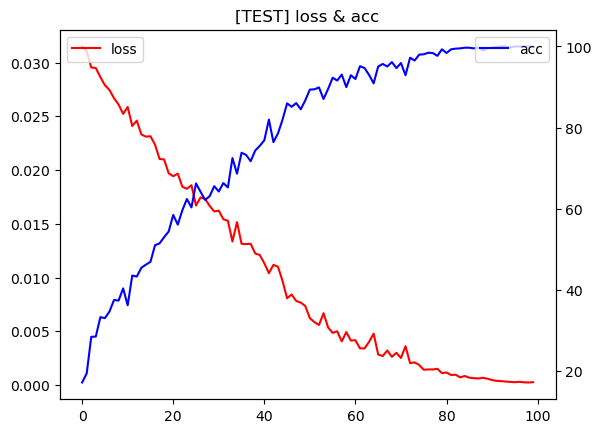

In [40]:
### 테스트 Loss와 Acc 시각화
fig, ax1 = plt.subplots()
ax1.plot(test_loss_list, label='loss', color='red')

ax2 = ax1.twinx()
ax2.plot(test_accuracy_list, label='acc', color='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('[TEST] loss & acc')
plt.show()

In [45]:
### 학습 모델 저장 관련 변수
import os

def save_torch_model(torch_model, filename, dir='./model/'):
    # dir이 잘못 설정되었을 경우의 처리는 하지 않은 코드
    if not filename.endswith(('.pt', '.pth')): return

    if not os.path.exists(dir):
        os.mkdir(dir)
    
    filepath = dir + filename

    torch.save(torch_model, filepath)

In [46]:
save_torch_model(model, 'rembg_adam_model.pth')

In [47]:
### 모델 불러오기
modelname = './model/rembg_adam_model.pth'
MODEL = torch.load(modelname)

In [73]:
import os, sys
from rembg import remove
from PIL import Image
Image.ANTIALIAS = Image.LANCZOS

def predict(model, image_path, crop_type='middle'):
    # image_path : 1장의 개 이미지 (7종 중 하나에 해당해야 함)
    size = 64, 64
    label_list = ['Chihuahua', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'beagle', 'bluetick', 'papillon']

    img = Image.open(image_path)
    img = img.convert('RGBA')
    img = remove(img)
    img_ratio = img.size[0] / float(img.size[1])    # 해당 이미지 비율
    ratio = size[0] / float(size[1])                # 목표 이미지 비율

    if ratio > img_ratio:
        img = img.resize((size[0], int(round(size[0] * img.size[1] / img.size[0]))),   
                            Image.ANTIALIAS)
        if crop_type == 'middle':
            box = (0, int(round((img.size[1] - size[1]) / 2)), 
                    img.size[0], int(round((img.size[1] + size[1]) / 2)))
        img = img.crop(box)
    elif ratio < img_ratio:
        img = img.resize((int(round(size[1] * img.size[0] / img.size[1])), size[1]),
                            Image.ANTIALIAS)
        if crop_type == 'middle':
            box = (int(round((img.size[0] - size[0]) / 2)), 0, 
                    int(round((img.size[0] + size[0]) / 2)), img.size[1])
        img = img.crop(box)
    else:
        img = img.resize((size[0], size[1]), Image.ANTIALIAS)
    
    img = img.convert('RGB')            # RGBA에서 RGB로 변환

    resize30 = transforms.Resize((30, 30))  # Resize 객체 생성
    totensor = transforms.ToTensor()        # ToTensor 객체 생성 (H*W*C -> C*H*W)

    img = resize30(img)
    img = totensor(img)

    # print(img.shape)
    # plt.imshow(np.transpose(img, (1, 2, 0)))    # (C, H, W) -> (H, W, C)로 변환

    model.eval()

    with torch.no_grad():
        output = model(img)
        prediction = output.max(1, keepdim = True)[1]
        print(f'해당 개의 종은 {label_list[prediction.item()]} 입니다.')

In [77]:
predict(MODEL, './predict_image/L1-BEAGLE.jpg')

해당 개의 종은 papillon 입니다.


In [78]:
predict(MODEL, './predict_image/chihuahua.jpeg')

해당 개의 종은 Chihuahua 입니다.


In [52]:
# input = Image.open('./L1-BEAGLE.jpg')
# input = input.convert('RGBA')
# output = remove(input)
# output.save('./beagle-rembg.png')